In [1]:
%matplotlib inline
import relplot as rp
from relplot import prepare_rel_diagram, plot_rel_diagram, smECE, rel_diagram
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
rp.config.use_tex_fonts = True # can change this to True if you have LaTeX installed.

## generate sample data for logistic regression (sklearn)
x_train, x_test, y_train, y_test = train_test_split(
                    *make_classification(n_samples = 700, random_state=0),
                    test_size=400, random_state=0)

model = LogisticRegressionCV().fit(x_train, y_train)
f_test = model.predict_proba(x_test)[:, 1]

calibration error: 0.13368462708105466


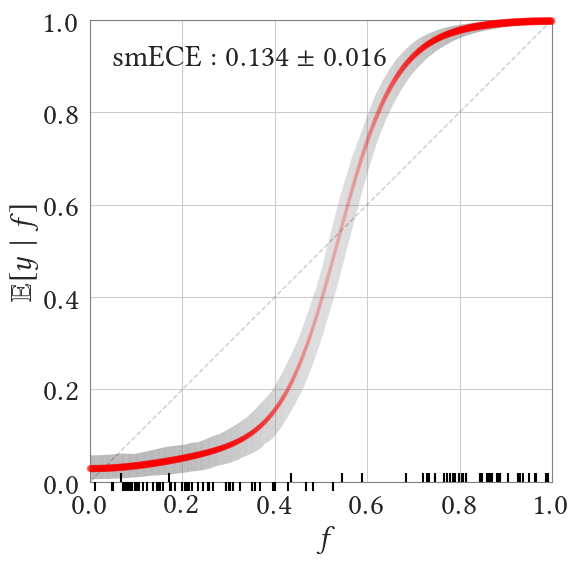

In [2]:
## plot calibration of model (our package)
print('calibration error:', smECE(f_test, y_test))
fig, ax = rel_diagram(f_test, y_test)

## Demonstrating various plotting options

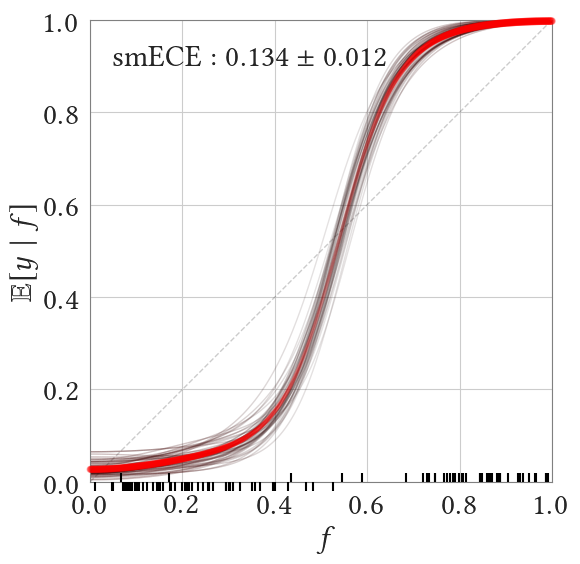

In [3]:
# Showing the individual bootstrapped estimators
diagram = prepare_rel_diagram(f_test, y_test, plot_bag_lines=True, plot_confidence_band=False)
fig, ax = plot_rel_diagram(diagram)

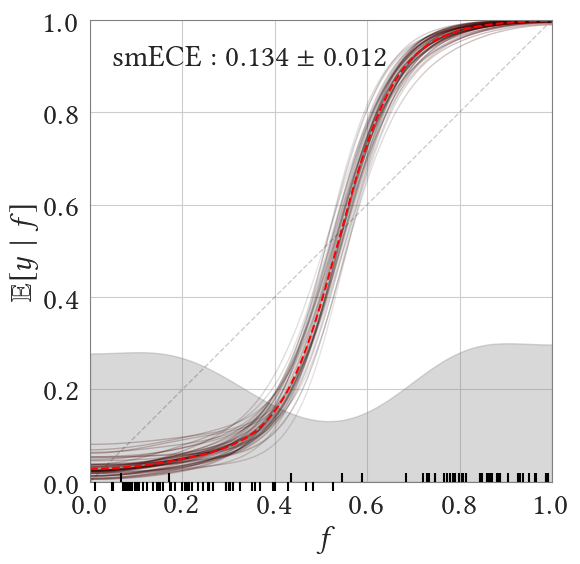

In [4]:
# Showing the density of predictions (via kde)
diagram = prepare_rel_diagram(f_test, y_test, plot_bag_lines=True, plot_confidence_band=False)
fig, ax = plot_rel_diagram(diagram, plot_density=True, simple_main_line=True)

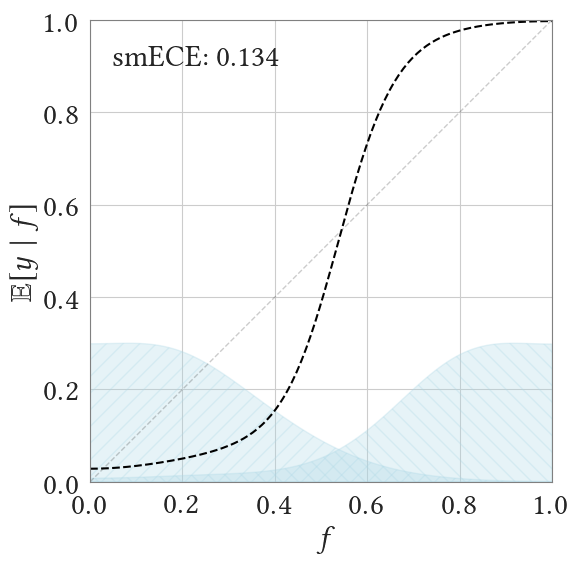

In [5]:
diagram = prepare_rel_diagram(f_test, y_test, 
                              plot_confidence_band=False,
                              report_CE_std=False)  # don't compute bootstrapped confidence intervals for smECE
fig, ax = plot_rel_diagram(diagram,
                           plot_density=True,
                           split_densities=True,
                           plot_density_ticks=False,
                           color='black',
                           density_color='lightblue',
                           simple_main_line=True)